In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
Control_WT_T0_T1 = pd.read_csv('../figures/direct/Control_WT_01/top25_pathways.csv', index_col=0, sep=',').set_index('Pathways').T
Control_WT_T0_T2 = pd.read_csv('../figures/direct/Control_WT_02/top25_pathways.csv', index_col=0,sep=',').set_index('Pathways').T
Control_MUT_T0_T1 = pd.read_csv('../figures/direct/Control_MUT_01/top25_pathways.csv', index_col=0,sep=',').set_index('Pathways').T
Control_MUT_T0_T2 = pd.read_csv('../figures/direct/Control_MUT_02/top25_pathways.csv', index_col=0,sep=',').set_index('Pathways').T
Control_WT_T0_T1 = Control_WT_T0_T1.rename(index={Control_WT_T0_T1.index[0]: "Control_WT_T0_T1"})
Control_WT_T0_T2 = Control_WT_T0_T2.rename(index={Control_WT_T0_T2.index[0]: "Control_WT_T0_T2"})
Control_MUT_T0_T1 = Control_MUT_T0_T1.rename(index={Control_MUT_T0_T1.index[0]: "Control_MUT_T0_T1"})
Control_MUT_T0_T2 = Control_MUT_T0_T2.rename(index={Control_MUT_T0_T2.index[0]: "Control_MUT_T0_T2"})
WT_T0_T1 = pd.read_csv('../figures/direct/WT_T0_T1/top25_pathways.csv', index_col=0, sep=',').set_index('Pathways').T
WT_T0_T2 = pd.read_csv('../figures/direct/WT_T0_T2/top25_pathways.csv', index_col=0,sep=',').set_index('Pathways').T
MUT_T0_T1 = pd.read_csv('../figures/direct/MUT_T0_T1/top25_pathways.csv', index_col=0,sep=',').set_index('Pathways').T
MUT_T0_T2 = pd.read_csv('../figures/direct/MUT_T0_T2/top25_pathways.csv', index_col=0,sep=',').set_index('Pathways').T
WT_T0_T1 = WT_T0_T1.rename(index={WT_T0_T1.index[0]: "WT_T0_T1"})
WT_T0_T2 = WT_T0_T2.rename(index={WT_T0_T2.index[0]: "WT_T0_T2"})
MUT_T0_T1 = MUT_T0_T1.rename(index={MUT_T0_T1.index[0]: "MUT_T0_T1"})
MUT_T0_T2 = MUT_T0_T2.rename(index={MUT_T0_T2.index[0]: "MUT_T0_T2"})

In [6]:
all_dfs =[Control_WT_T0_T1, WT_T0_T1, Control_WT_T0_T2, WT_T0_T2, Control_MUT_T0_T1, MUT_T0_T1, Control_MUT_T0_T2, MUT_T0_T2]

In [7]:
combined_df = pd.concat(all_dfs, ignore_index=False)
#combined_df.index.name=("Pathways")
combined_df = combined_df.rename(columns={"TFs": "Pathways"})
combined_df

Pathways,EGFR,PI3K,Androgen,MAPK,p53,JAK-STAT,TNFa,NFkB,Trail,WNT,VEGF,TGFb,Hypoxia,Estrogen
Control_WT_T0_T1,5.854388,-4.559085,-2.321027,-2.212727,2.012333,-1.924857,-1.346481,1.220879,0.975290,-0.919984,-0.913652,-0.687877,-0.509329,-0.487330
WT_T0_T1,-1.675549,1.450633,0.534618,1.949202,0.886448,-1.224709,-0.627537,-1.291368,-0.704875,-0.220663,0.141006,-1.424732,1.463303,-0.695236
Control_WT_T0_T2,2.327413,-4.978230,-0.986707,-1.327341,0.505496,-2.564869,-0.500800,0.906131,1.005743,0.948082,-0.760094,-1.157118,-2.223845,0.824126
WT_T0_T2,-0.927926,0.753270,-0.279723,0.330065,1.209253,-2.979240,-0.323599,-1.522280,-1.155623,-0.208748,-0.323363,-1.841876,1.428881,-0.570226
Control_MUT_T0_T1,0.126262,-0.323720,-1.043159,1.764932,-1.244843,6.480778,2.759889,-1.090030,0.272660,-0.753446,0.304310,-1.533572,1.765774,-1.660198
MUT_T0_T1,0.094664,-2.417686,1.750336,-0.332767,0.786407,-4.523353,-0.828480,0.665838,-0.245007,-1.919551,-0.290308,-0.651656,0.833546,0.296782
Control_MUT_T0_T2,3.325178,-4.915667,-2.706134,-0.217277,1.217080,9.095067,3.120081,-1.607708,1.539802,-2.219385,1.258025,-2.007071,0.388478,-2.524694
MUT_T0_T2,0.358994,-2.695829,0.644358,-1.101185,-0.068597,-5.073081,-0.170722,0.114953,-1.435531,-3.167550,-0.224056,0.273573,1.086239,0.721650


<Figure size 1600x600 with 0 Axes>

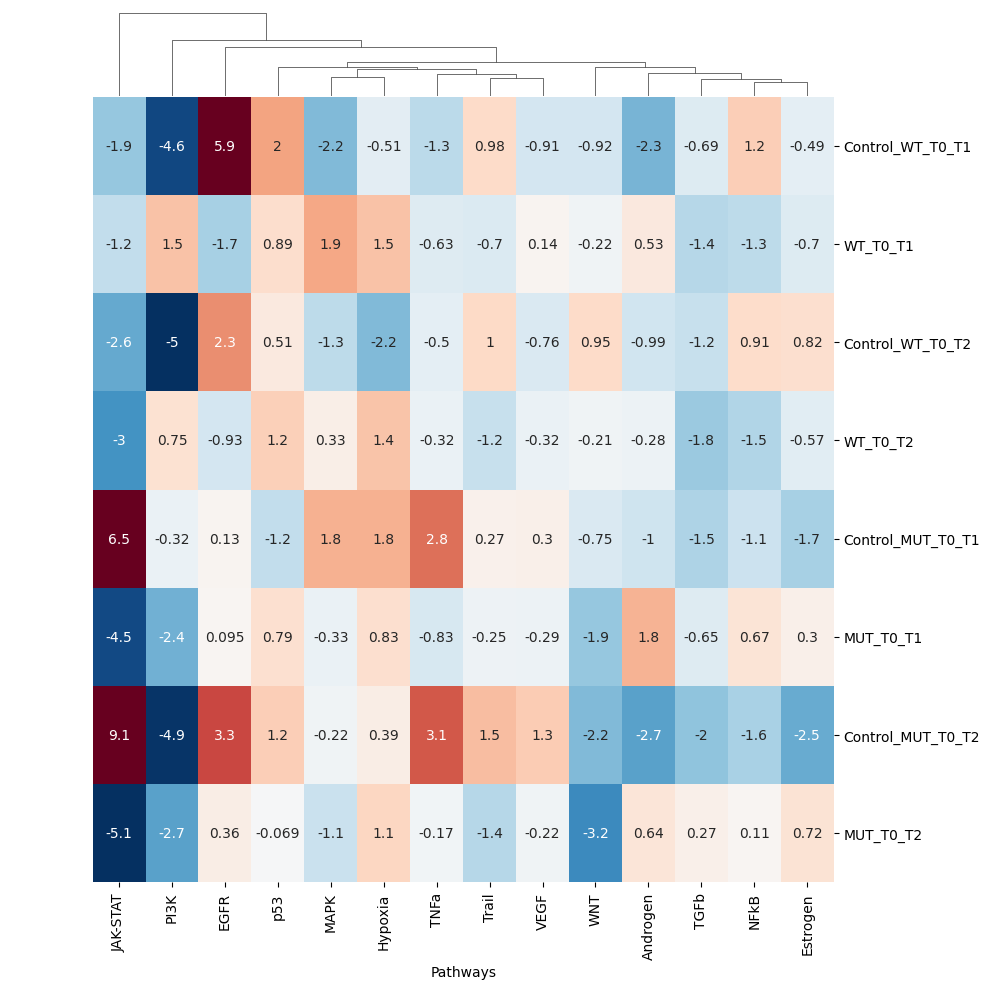

In [10]:
plt.figure(figsize=(16, 6))

# Create the heatmap with hierarchical clustering on the top
Z = linkage(combined_df.T, 'ward')
ax = sns.clustermap(
    combined_df,
    cmap='RdBu_r',
    annot=True,
    vmin=-5,
    vmax=5,
    row_cluster=False,  # Disable row clustering
    col_cluster=True,   # Enable column clustering
    dendrogram_ratio=(0.1),
    #cbar_pos=(0.02, 0.7, 0.05, 0.2)
    cbar_pos=None
)

#plt.title('Pathway Activity')
plt.savefig("../figures/direct/compare/all_pathway_heatmap.png")
plt.show()

<Figure size 1600x600 with 0 Axes>

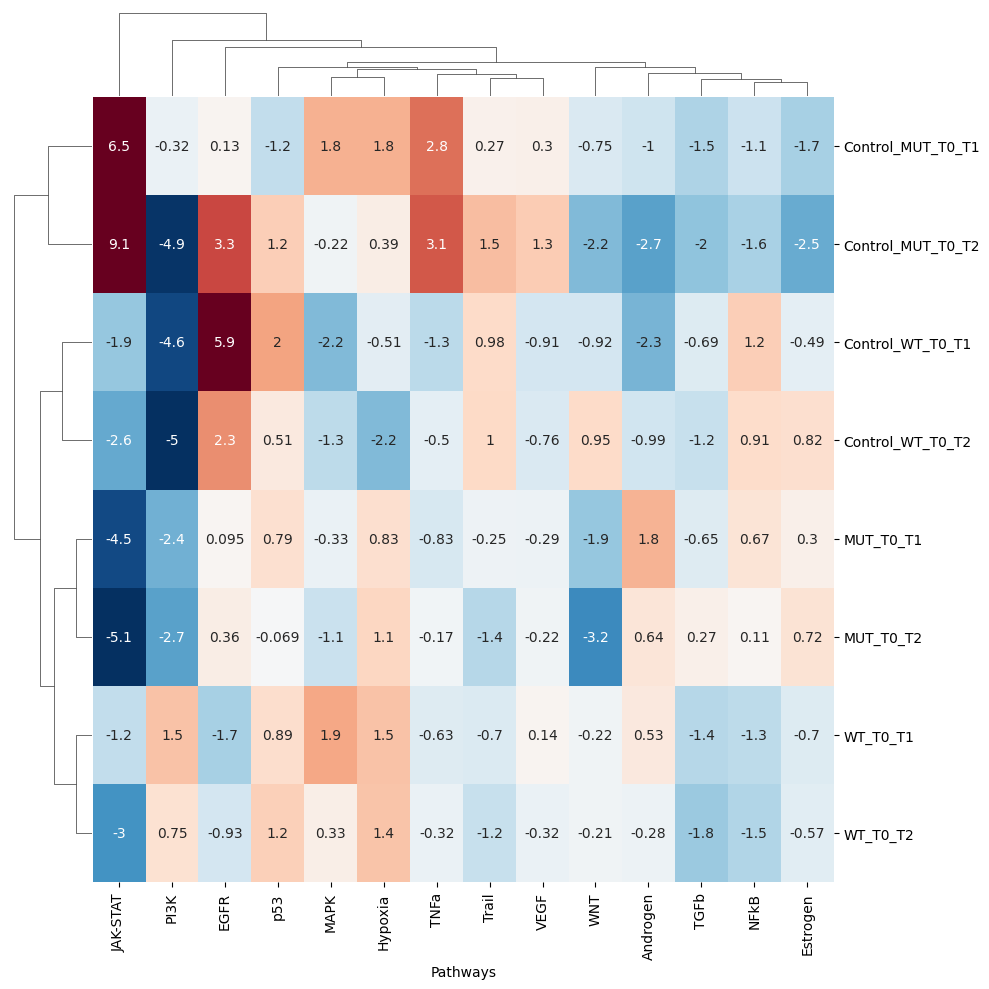

In [11]:
plt.figure(figsize=(16, 6))

# Create the heatmap with hierarchical clustering on the top
Z = linkage(combined_df.T, 'ward')
ax = sns.clustermap(
    combined_df,
    cmap='RdBu_r',
    annot=True,
    vmin=-5,
    vmax=5,
    row_cluster=True,  # Disable row clustering
    col_cluster=True,   # Enable column clustering
    dendrogram_ratio=(0.1),
    #cbar_pos=(0.02, 0.7, 0.05, 0.2)
    cbar_pos=None
)

#plt.title('Pathway Activity')
plt.savefig("../figures/direct/compare/all_clustered_pathway_heatmap.png")
plt.show()